In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import json      # library for working with JSON-formatted text strings
import pprint as pp    # library for cleanly printing Python data structures
import seaborn as sns
from datetime import datetime

This notebook loads in the Los Angeles Twitter Data from twitterscraper. We searched only for "climate change." The selected Twitter accounts are below; however one account did not have any tweets that mention climate change. We selected Los Angeles because it declared a climate emergency. Additionally, given how little climate change is tweeted about, we decided to scrape all tweets (no matter the timeframe).   

https://github.com/taspinar/twitterscraper/blob/master/README.rst

**@LACity**
twitterscraper "climate change from:LACity" --lang eng -o lacity_tweets.json

**@LADOTofficial**
twitterscraper "climate change from:LADOTofficial" --lang eng -o ladot_tweets.json

**@Planning4LA**
twitterscraper "climate change from:Planning4LA" --lang eng -o laplanning_tweets.json

**@lacountyparks**
twitterscraper "climate change from:lacountyparks" --lang eng -o lacountyparks_tweets.json

**@HCIDLA**
twitterscraper "climate change from:HCIDLA" --lang eng -o HCIDLA_tweets.json

In [12]:
def json_to_df_tweets (csv_file):
    with open(csv_file) as f:
      data = json.load(f)
    
    d = {'username': [x['username'] for x in data],
        'time': [x['timestamp'] for x in data],
        'tweet': [x['text'] for x in data],
        'likes': [x['likes'] for x in data],
        'replies': [x['replies'] for x in data]
        }
    
    df_Test = pd.DataFrame.from_dict(d)
    
    return df_Test

In [18]:
# Twitter data that states "climate change"; the scraper loads in requests by user
la_metro_tweets = json_to_df_tweets ('cc_test.JSON')
lacity_tweets = json_to_df_tweets ('lacity_tweets.json')
ladot_tweets = json_to_df_tweets('ladot_tweets.json')
laplanning_tweets = json_to_df_tweets('laplanning_tweets.json')
laport_tweets = json_to_df_tweets('laport_tweets.json')
la_parks_tweets = json_to_df_tweets('lacountyparks_tweets.json')

Using the function above "json_to_df_tweets" - we'll load all of the LA City tweets with the words "climate change" so that we can merge them together in one large df. 

In [19]:
def combine_dataframe (df1, df2, df3, df4, df5, df6): #this function smooshes all the dataframes into one using .append()
    d1 = df1.append(df2)
    d2 = d1.append(df3)
    d3 = d2.append(df4)
    d4 = d3.append(df5)
    d5 = d4.append(df6)
    return d5.drop_duplicates(subset='tweet', keep="first") #the scraper picked up dups, this rectifies that

In [20]:
la_tweets = combine_dataframe(ladot_tweets, la_metro_tweets, lacity_tweets, la_parks_tweets, laplanning_tweets, laport_tweets)
la_tweets

,username,time,tweet,likes,replies
0,LADOT,2019-10-10T00:00:31,Today @MayorOfLA Eric Garcetti was elected @c4...,33,5
2,LADOT,2019-04-29T19:01:08,Excited our @ladottransit is on track to be ze...,20,2
0,LA Metro,2014-04-01T18:32:47,TranspoNews: should Metro charge for parking a...,0,2
2,LA Metro,2012-10-24T17:51:30,"Transpo headlines: climate change non-issue, d...",0,0
4,LA Metro,2017-12-13T23:15:15,How We Roll: the future of Metrolink's Claremo...,4,1
5,LA Metro,2017-08-02T15:41:48,You also asked what you can do to fight climat...,17,1
6,LA Metro,2017-06-05T04:10:05,"Climate change gets its day in the sun, sort o...",6,3
7,LA Metro,2017-06-03T15:15:18,"Climate change gets its day in the sun, sort o...",3,1
8,LA Metro,2017-06-03T05:30:16,"Climate change gets its day in the sun, sort o...",6,0
9,LA Metro,2017-06-01T20:16:01,Looking for a way to fight climate change? Try...,59,5


We have all the tweets from LA city agencies that mention climate change. 

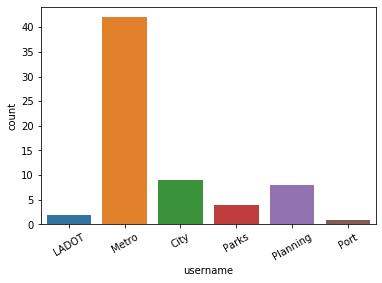

In [21]:
ax = sns.countplot(x='username', data=la_tweets)
ax.set_xticklabels(labels=['LADOT', 'Metro', 'City', 'Parks', 'Planning', 'Port'], rotation=30)
plt.show()

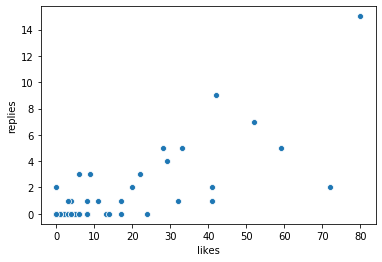

In [25]:
ax = sns.scatterplot(x="likes", y="replies", data=la_tweets)

In [27]:
date = [] 
for x in la_tweets['time']: 
    data = datetime.strptime(x, "%Y-%m-%dT%H:%M:%S")
    print(data)
    date.append(data)
    
la_tweets["date"] = date   
la_tweets.dtypes

2019-10-10 00:00:31
2019-04-29 19:01:08
2014-04-01 18:32:47
2012-10-24 17:51:30
2017-12-13 23:15:15
2017-08-02 15:41:48
2017-06-05 04:10:05
2017-06-03 15:15:18
2017-06-03 05:30:16
2017-06-01 20:16:01
2011-08-10 16:43:16
2016-04-22 19:30:17
2013-11-05 17:15:22
2013-10-04 16:18:21
2013-09-11 22:03:20
2013-08-12 18:14:31
2013-05-28 17:37:40
2013-05-22 17:22:14
2013-04-17 21:54:17
2015-03-30 19:00:15
2014-10-06 15:34:18
2014-09-26 20:12:40
2012-01-23 18:06:21
2012-01-09 18:47:24
2011-12-22 19:36:45
2019-04-19 02:00:35
2019-04-11 21:45:15
2017-01-25 20:42:50
2017-01-18 16:56:18
2016-12-07 07:30:17
2016-11-21 21:00:30
2016-11-01 21:42:35
2016-11-01 21:11:30
2016-11-01 16:37:12
2016-11-01 07:15:09
2015-11-10 09:00:13
2015-11-07 03:30:06
2015-10-27 18:00:09
2015-04-29 19:13:14
2020-01-22 18:32:35
2019-09-11 02:15:03
2019-08-01 17:20:15
2019-07-29 17:20:12
2019-07-26 19:20:07
2019-03-15 22:41:31
2019-11-05 23:13:28
2019-09-05 19:57:02
2018-08-27 21:35:22
2018-06-15 21:24:14
2018-01-24 20:51:27


username            object
time                object
tweet               object
likes                int64
replies              int64
date        datetime64[ns]
dtype: object

In [31]:
import plotly.express as px

fig = px.scatter(la_tweets, x='date', y='likes', color="username")
fig.show()

In [33]:
fig = px.scatter(la_tweets, x='date', y = 'replies', color="username")
fig.show()